In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sms_raw = pd.read_csv("imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['feedback', 'Good']

In [11]:
sms_raw.head(100)

,feedback,Good
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [21]:
keywords = ['good', 'love', 'Love', 'Loved', 'loved','lovely', 'Lovely', 'better', 'entertaining', 'best', 'well', 'beautiful', 'funny', '10','pretty','classic','awesome','great','happy','interesting','!','enjoyed','delight','cool','Cool','masterful','creative', 'original', 'creative', 'decent', 'greatest', 'fine', 'perfect''good', 'Better', 'Entertaining', 'Best', 'Well', 'Beautiful', 'Funny', '10','Pretty','Classic','Awesome','Great','Happy','Interesting','!','Enjoyed','Delight','Masterful','Creative', 'Original', 'Creative', 'Decent', 'Greatest', 'Fine', 'Perfect','wonderful', 'smart', 'smile', 'genuine', 'wonderfully', 'excellent', 'amazing', 'Wonderful', 'Smart', 'Smile', 'Genuine', 'Wonderfully', 'Excellent', 'Amazing']

for key in keywords:
    sms_raw[str(key)] = sms_raw.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [22]:
sms_raw.head()

,feedback,Good,good,love,Love,Loved,loved,lovely,Lovely,better,...,wonderfully,excellent,amazing,Wonderful,Smart,Smile,Genuine,Wonderfully,Excellent,Amazing
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
sms_raw['mark'] = sms_raw.feedback.str.contains('!')
#sms_raw['Good'] = (sms_raw['Good'] == 'Good')
data = sms_raw[keywords + ['mark']]

target = sms_raw['Good']

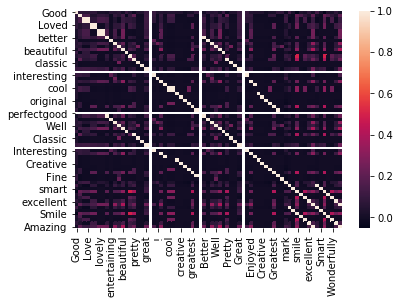

In [24]:
sns.heatmap(sms_raw.corr())

In [25]:
#data = sms_raw[keywords]
#target = sms_raw['Good']

In [26]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

# Fit our model to the data.
#clf.fit(data, target)
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 272


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[336,  26],
       [246, 140]], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5333333333333333
Testing on Sample: 0.6109625668449198


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.60526316, 0.56578947, 0.58666667, 0.62666667, 0.62666667,
       0.52      , 0.66216216, 0.60810811, 0.56756757, 0.51351351])